In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
from tensorflow import keras
import numpy as np

In [ ]:
os.mkdir('/root/.kaggle') 

In [ ]:
copyfile('/kaggle.json', '/root/.kaggle/kaggle.json')

'/root/.kaggle/kaggle.json'

In [ ]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 36.2MB/s]
 94% 254M/271M [00:01<00:00, 194MB/s]
100% 271M/271M [00:01<00:00, 161MB/s]
 99% 540M/544M [00:04<00:00, 194MB/s]
100% 544M/544M [00:04<00:00, 133MB/s]


In [ ]:



local_zip1='/content/train.zip'
local_zip2='/content/test.zip'
zipref = zipfile.ZipFile(local_zip1,'r')
zipref.extractall('/tmp')
zipref.close()
zipref1 = zipfile.ZipFile(local_zip2,'r')
zipref1.extractall('/tmp')
zipref1.close()

# New Section

In [ ]:
print(len(os.listdir('/tmp/train/')))
print(len(os.listdir('/tmp/test/')))

25000
12500


In [ ]:
jk=os.listdir('/tmp/train/')
if 'cat' in jk[0]:
  print(jk[0]) 
else:
  pass

In [ ]:
try:
  os.mkdir('/tmp/cats-v-dogs')
  os.mkdir('/tmp/cats-v-dogs/testing')
  os.mkdir('/tmp/cats-v-dogs/training')
  os.mkdir('/tmp/cats-v-dogs/training/cats')
  os.mkdir('/tmp/cats-v-dogs/training/dogs')
  os.mkdir('/tmp/cats-v-dogs/testing/cats')
  os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
  pass

In [ ]:
try:
  os.mkdir('/tmp/training')
  os.mkdir('/tmp/training/cats')
  os.mkdir('/tmp/training/dog')
  
except OSError:
  pass

In [ ]:
def split_train(source,catad,dogad):
  file1=[]
  file2=[]
  for filename in os.listdir(source):
    if 'cat' in filename:
      jile = source + filename
      if os.path.getsize(jile) > 0:
            file1.append(filename)
      else:
            print(filename + " is zero length, so ignoring.")
    else:
      jile = source + filename
      if os.path.getsize(jile) > 0:
            file2.append(filename)
      else:
            print(filename + " is zero length, so ignoring.")
  
  for filename in file1:
        this_file = source + filename
        destination = catad + filename
        copyfile(this_file, destination)
  for filename in file2:
        this_file = source + filename
        destination = dogad + filename
        copyfile(this_file, destination)

split_train('/tmp/train/','/tmp/training/cats/','/tmp/training/dog/')
print(len(os.listdir('/tmp/training/cats/')))
print(len(os.listdir('/tmp/training/dog/')))

12500
12500


In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/training/cats/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/training/dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))


11250
11250
1250
1250


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])


In [ ]:

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(300, 300))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
# Experiment with your own parameters here to really try to drive it to 99.9% accuracy or better
validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(300, 300))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.


Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
# Note that this may take some time.
history = model.fit_generator(train_generator,
                              epochs=19,
                              verbose=1,
                              validation_data=validation_generator)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/19
225/225 [==============================] - 606s 3s/step - loss: 0.6896 - acc: 0.5694 - val_loss: 0.6476 - val_acc: 0.6444
Epoch 2/19
225/225 [==============================] - 573s 3s/step - loss: 0.6247 - acc: 0.6548 - val_loss: 0.6322 - val_acc: 0.6588
Epoch 3/19
225/225 [==============================] - 567s 3s/step - loss: 0.5850 - acc: 0.6950 - val_loss: 0.5480 - val_acc: 0.7160
Epoch 4/19
225/225 [==============================] - 565s 3s/step - loss: 0.5538 - acc: 0.7179 - val_loss: 0.5481 - val_acc: 0.7196
Epoch 5/19
225/225 [==============================] - 563s 3s/step - loss: 0.5342 - acc: 0.7361 - val_loss: 0.5657 - val_acc: 0.7072
Epoch 6/19
225/225 [==============================] - 558s 2s/step - loss: 0.5073 - acc: 0.7524 - val_loss: 0.5613 - val_acc: 0.7196
Epoch 7/19
225/225 [==============================] - 555s 2s/step - loss: 0.4901 - acc: 0.7657 - val_loss: 0.4515 - val_acc: 0.7916
Epoch 8/19
225/225 [==============================] - 554s 2s/step - 

In [ ]:
sample =pd.read_csv('/content/sample_submission.csv')
sample.head()

,id,label
0,1,0.5
1,2,0.5
2,3,0.5
3,4,0.5
4,5,0.5


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      12500 non-null  int64  
 1   label   12500 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 195.4 KB


In [ ]:
base_model = tf.keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(300, 300, 3),
    include_top=False)  
base_model.trainable = False


In [ ]:
base_model1 = tf.keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(300, 300, 3),
    include_top=False)  
base_model1.trainable = True


83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
inputs1 = tf.keras.Input(shape=(300, 300, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x1 = base_model1(inputs1, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x1 = tf.keras.layers.GlobalAveragePooling2D()(x1)
# A Dense classifier with a single unit (binary classification)
x1 = tf.keras.layers.Dense(16)(x1)
x1 = tf.keras.layers.Dropout(0.2)(x1)
outputs1 = tf.keras.layers.Dense(1)(x1)
model2 = tf.keras.Model(inputs1, outputs1)
model2.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
inputs = tf.keras.Input(shape=(300, 300, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
x = tf.keras.layers.Dense(16)(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1)(x)
model1 = tf.keras.Model(inputs, outputs)
model1.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history1 = model1.fit_generator(train_generator,
                              epochs=18,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/18
225/225 [==============================] - 545s 2s/step - loss: 0.2630 - acc: 0.9709 - val_loss: 0.2414 - val_acc: 0.9764
Epoch 2/18
225/225 [==============================] - 541s 2s/step - loss: 0.2424 - acc: 0.9771 - val_loss: 0.1302 - val_acc: 0.9884
Epoch 3/18
225/225 [==============================] - 545s 2s/step - loss: 0.2082 - acc: 0.9816 - val_loss: 0.2985 - val_acc: 0.9744
Epoch 4/18
225/225 [==============================] - 546s 2s/step - loss: 0.2214 - acc: 0.9814 - val_loss: 0.1110 - val_acc: 0.9904
Epoch 5/18
225/225 [==============================] - 547s 2s/step - loss: 0.2045 - acc: 0.9834 - val_loss: 0.1467 - val_acc: 0.9880
Epoch 6/18
225/225 [==============================] - 547s 2s/step - loss: 0.2124 - acc: 0.9829 - val_loss: 0.1960 - val_acc: 0.9856
Epoch 7/18
225/225 [==============================] - 546s 2s/step - loss: 0.2024 - acc: 0.9838 - val_loss: 0.1626 - val_acc: 0.9860
Epoch 8/18
225/225 [==============================] - 548s 2s/step - 

In [ ]:
base_model.trainable = True
model1.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])
history1 = model1.fit(train_generator,
                              epochs=7,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/7


ResourceExhaustedError: ignored

In [ ]:
history2 = model2.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15


ResourceExhaustedError: ignored

<Figure size 432x288 with 0 Axes>

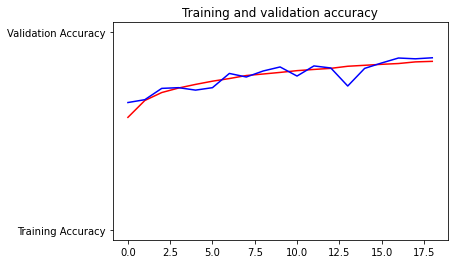

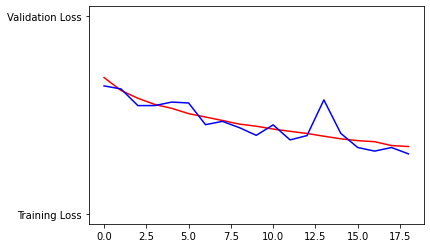

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
result=pd.DataFrame(columns=['id','label'])

result

,id,label


In [ ]:
testimg=os.listdir('/tmp/test/')
sor="/tmp/test/"




In [ ]:
for i,img in enumerate(testimg):
  img1 = keras.preprocessing.image.load_img(os.path.join(sor,img),target_size=(300,300,3))
  x = keras.preprocessing.image.img_to_array(img1)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model1.predict(images)
  result=result.append({'id':img,'label':classes[0]},ignore_index = True)
  '''
  if classes[0] > 0.5:
    result=result.append({'id':img,'label':1},ignore_index = True)
  else:
    result=result.append({'id':img,'label':0},ignore_index = True)
  '''

In [ ]:
result.head()

,id,label
0,4488.jpg,[-412.6466]
1,980.jpg,[-64.735504]
2,7051.jpg,[-136.46971]
3,9954.jpg,[-117.8611]
4,1585.jpg,[-133.4179]


In [ ]:
result['id'] = [x[:-4] for x in result['id']]

In [ ]:
result['id'] = result['id'].astype(int)

In [ ]:
result[result['id']==1]

,id,label
6488,1,[-141.63126]


In [ ]:
result['label'] = result['label'].astype(float)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      12500 non-null  int64  
 1   label   12500 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 195.4 KB


In [ ]:
result[result['id']==1]

,id,label
6488,1,-141.631256


In [ ]:
result.head()

,id,label
0,4488,-412.646606
1,980,-64.735504
2,7051,-136.469711
3,9954,-117.861099
4,1585,-133.417892


In [ ]:
result=result.sort_values(by=['id'])

In [ ]:
result.to_csv('/tmp/subm2.csv',index=False)

<Figure size 432x288 with 0 Axes>

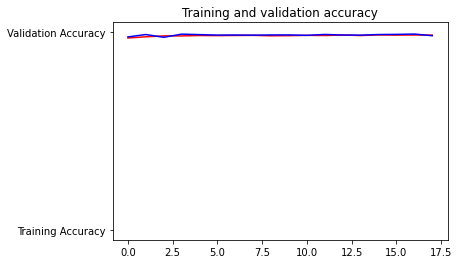

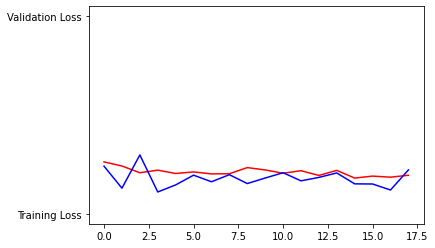

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc1=history1.history['acc']
val_acc1=history1.history['val_acc']
loss1=history1.history['loss']
val_loss1=history1.history['val_loss']

epochs=range(len(acc1)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc1, 'r', "Training Accuracy")
plt.plot(epochs, val_acc1, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss1, 'r', "Training Loss")
plt.plot(epochs, val_loss1, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving download.jpg to download.jpg
[1.]
download.jpg is a dog
